In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df = pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [31]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [32]:
df['type'].value_counts()
df['country'].value_counts().head(10)
df['rating'].value_counts()

,count
rating,
TV-MA,3207
TV-14,2160
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220


In [33]:
df['country'] = df['country'].fillna("Unknown")
df['rating'] = df['rating'].fillna("Unknown")
df = df.dropna(subset=['date_added'])

In [34]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2624
cast,825
country,0
date_added,0
release_year,0
rating,0
duration,3


In [35]:
df['date_added'] = df['date_added'].astype(str)
df['date_added'] = df['date_added'].str.strip()
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
df = df.dropna(subset=['year_added'])

In [36]:
df[['date_added', 'year_added']].head()

,date_added,year_added
0,2021-09-25,2021
1,2021-09-24,2021
2,2021-09-24,2021
3,2021-09-24,2021
4,2021-09-24,2021


/tmp/ipython-input-1643480581.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette=['#403D58', '#658E9C'])


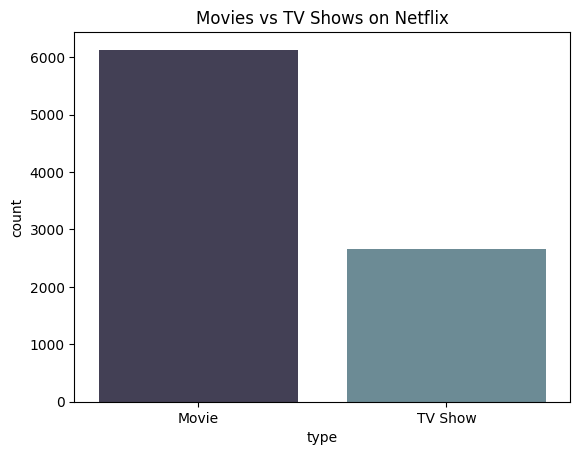

In [58]:
sns.countplot(x='type', data=df, palette=['#403D58', '#658E9C'])
plt.title("Movies vs TV Shows on Netflix")
plt.show()

/tmp/ipython-input-596680333.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


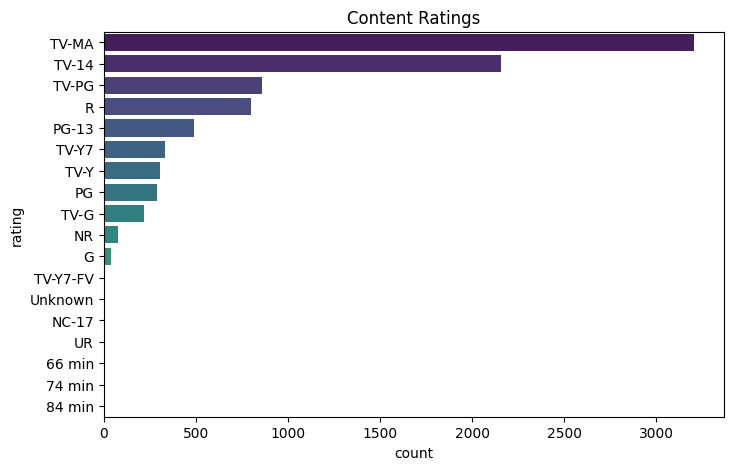

In [22]:
plt.figure(figsize=(8,5))
sns.countplot(
    y='rating',
    data=df,
    order=df['rating'].value_counts().index,
    palette='viridis'
)
plt.title("Content Ratings")
plt.show()

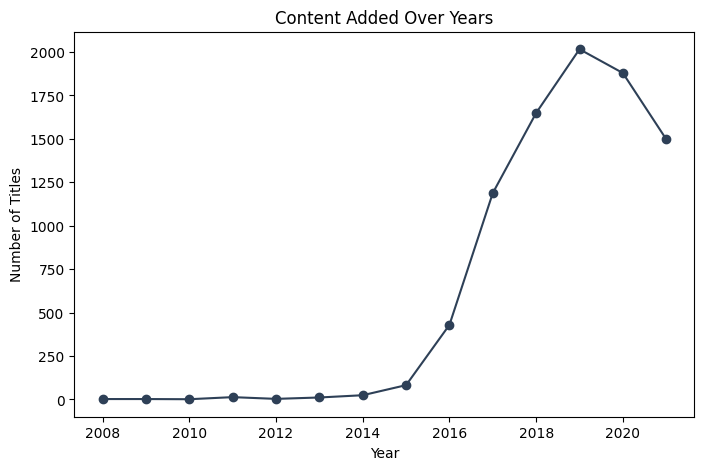

In [41]:
plt.figure(figsize=(8,5))
df['year_added'].value_counts().sort_index().plot(
    kind='line',
    color='#2E4057',
    marker='o'
)
plt.title("Content Added Over Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.show()

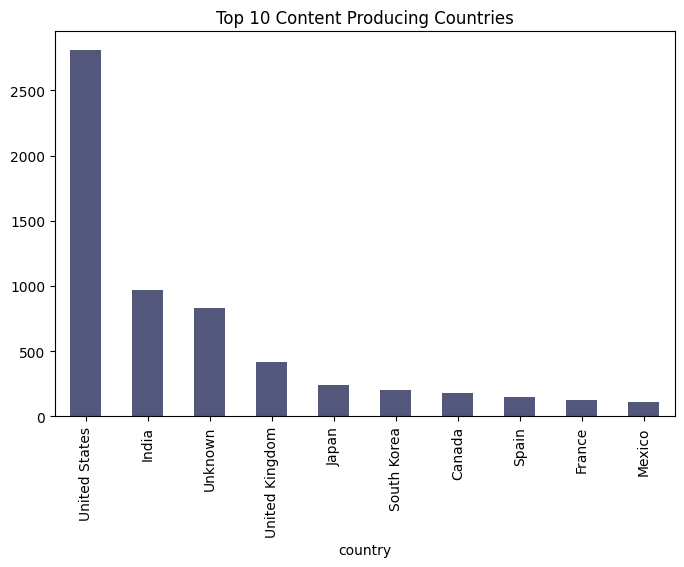

In [45]:
plt.figure(figsize=(8,5))
df['country'].value_counts().head(10).plot(
    kind='bar',
    color='#54577C'
)
plt.title("Top 10 Content Producing Countries")
plt.show()

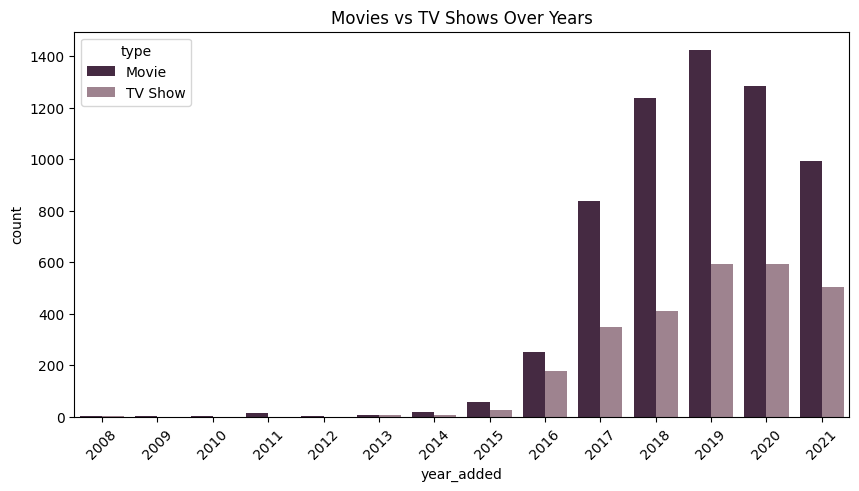

In [49]:
plt.figure(figsize=(10,5))
sns.countplot(
    x='year_added',
    hue='type',
    data=df,
    palette=['#4A2545', '#A27E8E']
)
plt.xticks(rotation=45)
plt.title("Movies vs TV Shows Over Years")
plt.show()

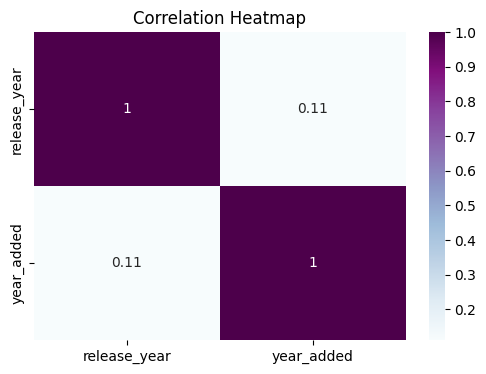

In [52]:
plt.figure(figsize=(6,4))
sns.heatmap(
    df.corr(numeric_only=True),
    annot=True,
    cmap='BuPu'
)
plt.title("Correlation Heatmap")
plt.show()

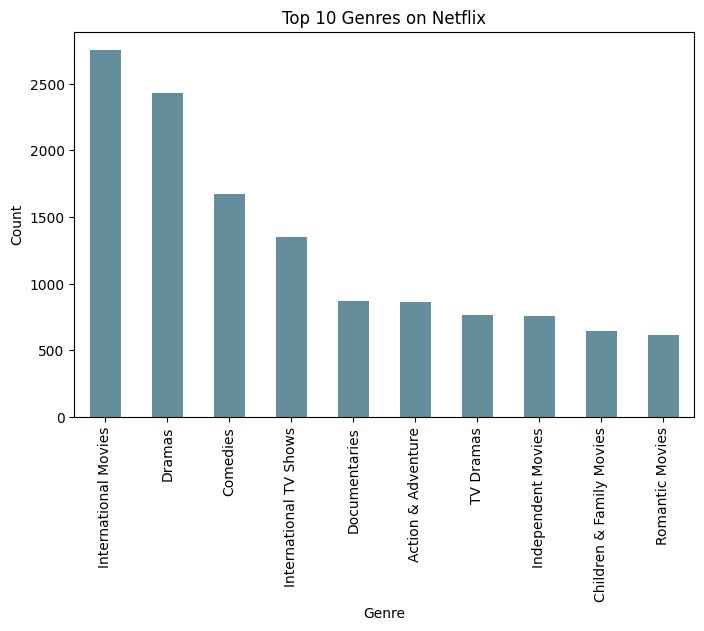

In [57]:
genres = df['listed_in'].str.split(', ', expand=True).stack()

plt.figure(figsize=(8,5))
genres.value_counts().head(10).plot(kind='bar', color='#658E9C')
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()

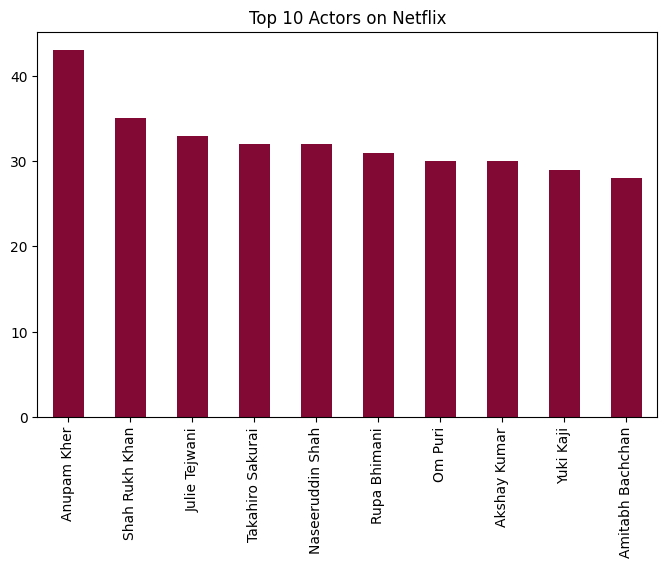

In [67]:
actors = df['cast'].str.split(', ', expand=True).stack()

plt.figure(figsize=(8,5))
actors.value_counts().head(10).plot(kind='bar', color='#820933')
plt.title("Top 10 Actors on Netflix")
plt.show()